In [2]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (6, 1)
mpl.rcParams['figure.dpi'] = 200

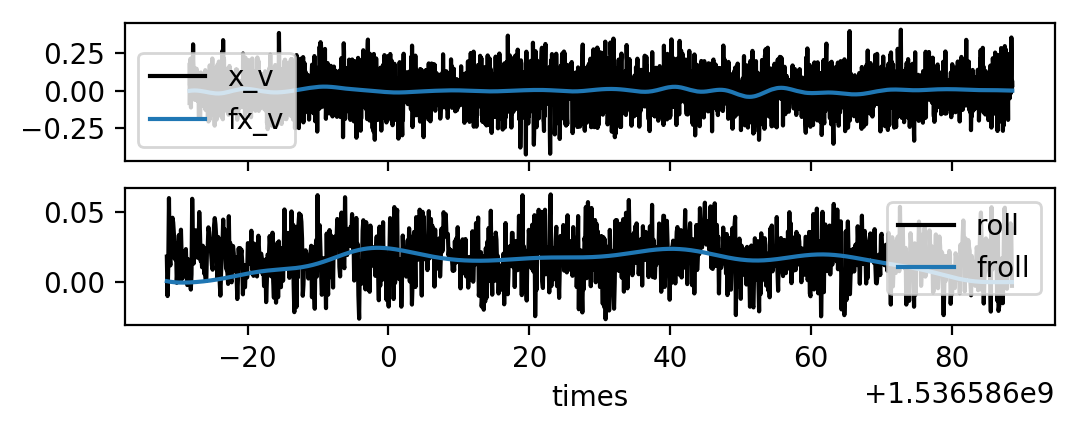

In [5]:
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pid_out = pd.read_csv('_slash_mavros_slash_target_actuator_control_1.csv')
pid_out['times'] = pid_out.secs + 1e-9 * pid_out.nsecs

# angles = pd.read_csv('_slash_mavros_slash_imu_slash_data.csv')
# angles['times'] = angles.secs + 1e-9 * angles.nsecs

angles_raw = pd.read_csv('_slash_mavros_slash_local_position_slash_velocity.csv')
angles_raw['times'] = angles_raw.secs + 1e-9 * angles_raw.nsecs

b, a = signal.butter(8, 0.01)

pid_out["froll"] = signal.filtfilt(b, a, pid_out.roll, method="gust")
pid_out["fpitch"] = signal.filtfilt(b, a, pid_out.pitch, method="gust")
pid_out["fyaw"] = signal.filtfilt(b, a, pid_out.yaw, method="gust")

b, a = signal.butter(8, 0.01)
# angles['fx.1'] = signal.filtfilt(b, a, angles["x.1"], method="gust")
# angles['fz.1'] = signal.filtfilt(b, a, angles["z.1"], method="gust")

angles_raw['fx_v'] = signal.filtfilt(b, a, angles_raw["x_v"], method="gust")
angles_raw['fy_v'] = signal.filtfilt(b, a, angles_raw["y_v"], method="gust")
angles_raw['fz_v'] = signal.filtfilt(b, a, angles_raw["z_v"], method="gust")

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 2))
# angles.plot(kind='line',x='times',y='x.1', color='black', ax=ax[0])
# angles.plot(kind='line',x='times',y='fx.1', ax=ax[0])
angles_raw.plot(kind='line',x='times',y='x_v', color='black', ax=ax[0])
angles_raw.plot(kind='line',x='times',y='fx_v', ax=ax[0])

pid_out.plot(kind='line',x='times', y='roll', color='black', ax=ax[1])
pid_out.plot(kind='line',x='times', y='froll', ax=ax[1])

plt.show()
np.save('torque_froll.npy',np.array(pid_out["froll"]))
np.save('torque_fpitch.npy',np.array(pid_out["fpitch"]))
np.save('torque_fyaw.npy',np.array(pid_out["fyaw"]))
np.save('torque_times.npy',np.array(pid_out["times"]))

np.save('ang_vel_froll.npy',np.array(angles_raw["fx_v"]))
np.save('ang_vel_fpitch.npy',np.array(angles_raw["fy_v"]))
np.save('ang_vel_fyaw.npy',np.array(angles_raw["fz_v"]))
np.save('ang_vel_times.npy',np.array(angles_raw["times"]))

In [22]:
pid_out

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,group_mix,roll,pitch,yaw,throttle,flaps,spoilers,airbrakes,landing_gear,times,froll,fpitch,fyaw
0,1536585971835325202,NaN,2382,NaN,1536585968,545057184,'',0,0.018233,-0.017337,0.011246,0.425668,0.0,0.0,0.0,-1.0,1.536586e+09,-0.000061,0.000269,-0.000625
1,1536585971835393227,NaN,2383,NaN,1536585968,646633880,'',0,-0.010000,-0.029810,0.002761,0.421477,0.0,0.0,0.0,-1.0,1.536586e+09,-0.000450,0.000474,-0.000463
2,1536585971835448755,NaN,2384,NaN,1536585968,746624832,'',0,0.011405,-0.015411,0.003814,0.416675,0.0,0.0,0.0,-1.0,1.536586e+09,-0.000857,0.000696,-0.000305
3,1536585971835503257,NaN,2385,NaN,1536585968,846674296,'',0,0.060172,0.006391,0.001868,0.423736,0.0,0.0,0.0,-1.0,1.536586e+09,-0.001279,0.000932,-0.000152
4,1536585971835563741,NaN,2386,NaN,1536585968,946630920,'',0,0.018436,-0.012599,-0.004823,0.422917,0.0,0.0,0.0,-1.0,1.536586e+09,-0.001712,0.001182,-0.000006
5,1536585971835612488,NaN,2387,NaN,1536585969,48236520,'',0,0.011956,-0.019471,-0.009198,0.421467,0.0,0.0,0.0,-1.0,1.536586e+09,-0.002154,0.001444,0.000134
6,1536585971835656378,NaN,2388,NaN,1536585969,148210680,'',0,0.041191,0.005706,-0.003809,0.424435,0.0,0.0,0.0,-1.0,1.536586e+09,-0.002601,0.001715,0.000266
7,1536585971835692542,NaN,2389,NaN,1536585969,248212792,'',0,0.039430,0.007375,-0.002329,0.427628,0.0,0.0,0.0,-1.0,1.536586e+09,-0.003050,0.001994,0.000389
8,1536585971835745300,NaN,2390,NaN,1536585969,348143720,'',0,0.046107,0.009933,-0.003465,0.429256,0.0,0.0,0.0,-1.0,1.536586e+09,-0.003499,0.002279,0.000504
9,1536585971835819432,NaN,2391,NaN,1536585969,445859184,'',0,0.042652,-0.008313,-0.000115,0.426772,0.0,0.0,0.0,-1.0,1.536586e+09,-0.003945,0.002568,0.000609


In [23]:
angles_raw

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,twist,linear,x,y,z,angular,x_v,y_v,z_v,times,fx_v,fy_v,fz_v
0,1.536586e+18,NaN,7242,NaN,1536585971,771411584,"""map""",NaN,NaN,-0.093246,-0.004138,0.017792,NaN,-0.082842,-0.008780,-0.015816,1.536586e+09,-2.010074e-03,-4.804507e-04,-6.798374e-04
1,1.536586e+18,NaN,7243,NaN,1536585971,801411584,"""map""",NaN,NaN,-0.084496,0.007615,0.008762,NaN,0.182698,0.135952,-0.016523,1.536586e+09,-1.751865e-03,-4.399978e-04,-5.705148e-04
2,1.536586e+18,NaN,7244,NaN,1536585971,831411584,"""map""",NaN,NaN,-0.076448,0.011826,0.009764,NaN,0.034161,0.160308,-0.008587,1.536586e+09,-1.508029e-03,-4.004674e-04,-4.688750e-04
3,1.536586e+18,NaN,7245,NaN,1536585971,871409024,"""map""",NaN,NaN,-0.081962,0.010531,0.022108,NaN,0.187037,0.086677,-0.009552,1.536586e+09,-1.278372e-03,-3.618116e-04,-3.747361e-04
4,1.536586e+18,NaN,7246,NaN,1536585971,901409024,"""map""",NaN,NaN,-0.076089,0.010991,0.005663,NaN,0.211621,0.219419,0.000232,1.536586e+09,-1.062705e-03,-3.239905e-04,-2.879176e-04
5,1.536586e+18,NaN,7247,NaN,1536585971,931409024,"""map""",NaN,NaN,-0.079372,0.006525,-0.003102,NaN,-0.048938,0.177073,0.010398,1.536586e+09,-8.608399e-04,-2.869723e-04,-2.082405e-04
6,1.536586e+18,NaN,7248,NaN,1536585971,971403904,"""map""",NaN,NaN,-0.076454,0.023668,0.003765,NaN,-0.112862,0.070686,0.015233,1.536586e+09,-6.725898e-04,-2.507326e-04,-1.355272e-04
7,1.536586e+18,NaN,7249,NaN,1536585972,1403904,"""map""",NaN,NaN,-0.068455,0.020129,0.000623,NaN,0.092097,0.108839,0.020578,1.536586e+09,-4.977689e-04,-2.152542e-04,-6.960189e-05
8,1.536586e+18,NaN,7250,NaN,1536585972,31403904,"""map""",NaN,NaN,-0.075364,0.016179,0.007410,NaN,-0.025452,0.045441,0.018228,1.536586e+09,-3.361919e-04,-1.805266e-04,-1.029010e-05
9,1.536586e+18,NaN,7251,NaN,1536585972,71403136,"""map""",NaN,NaN,-0.072727,0.021093,0.000087,NaN,0.106750,0.070709,0.014727,1.536586e+09,-1.876748e-04,-1.465460e-04,4.258090e-05


In [ ]:
angles

In [ ]:
plt.plot(pid_out_f)

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 4))
angles.plot(kind='line',x='secs',y='x.1', color='black', ax=ax[0])
pid_out.plot(kind='line',x='secs',y='roll', color='black', ax=ax[1])

In [ ]:
pd.tim